In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [45]:
df.shape

(10000, 6)

In [46]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [47]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")


Hours Studied: [7 4 8 5 3 6 2 1 9]
Previous Scores: [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Extracurricular Activities: ['Yes' 'No']
Sleep Hours: [9 4 7 5 8 6]
Sample Question Papers Practiced: [1 2 5 6 0 8 3 4 9 7]
Performance Index: [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


In [48]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [49]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [50]:
print(df['Extracurricular Activities'].unique())
print(df.groupby('Extracurricular Activities')['Performance Index'].mean())

['Yes' 'No']
Extracurricular Activities
No     54.758511
Yes    55.700889
Name: Performance Index, dtype: float64


In [51]:
print("\nTarget variable stats (Performance Index):")
print(df['Performance Index'].describe())


Target variable stats (Performance Index):
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64


In [52]:
print("Dataset shape:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget variable stats (Performance Index):")
print(df['Performance Index'].describe())


Dataset shape: (10000, 6)

Data types:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Missing values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Target variable stats (Performance Index):
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64


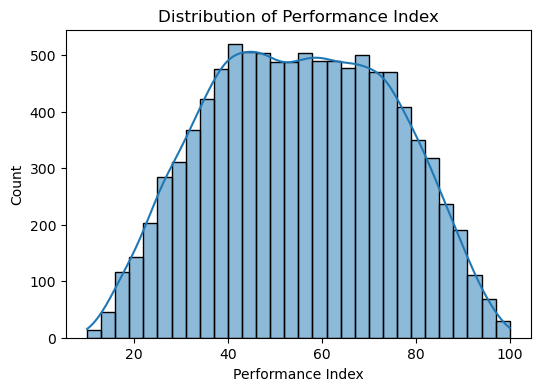

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(df['Performance Index'], bins=30, kde=True)
plt.title("Distribution of Performance Index")
plt.show()


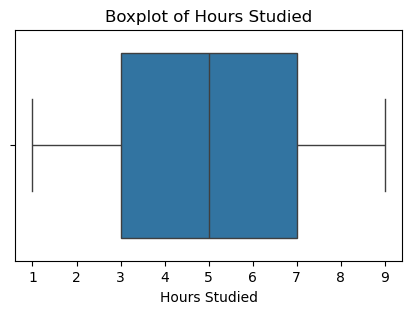

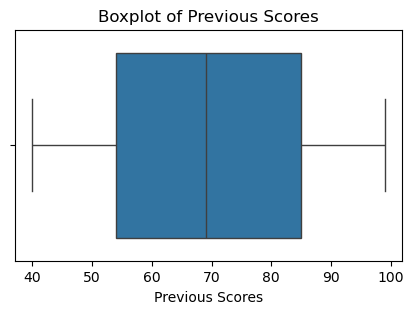

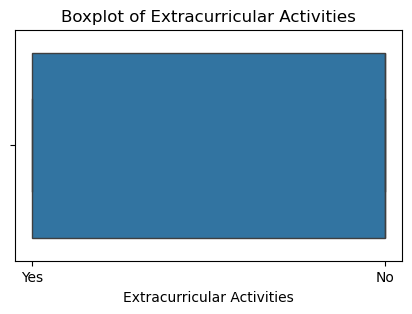

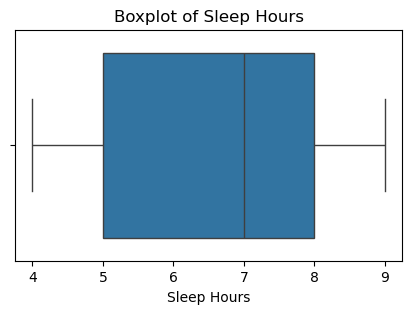

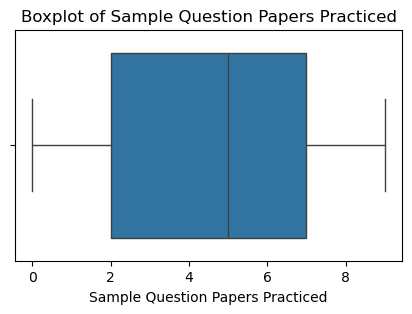

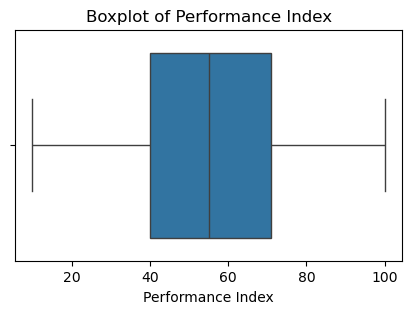

In [54]:
for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [55]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [56]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [57]:
x= df.drop('Performance Index', axis=1)
y = df['Performance Index']


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [65]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8000, 5) (8000,)
(2000, 5) (2000,)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ("scaler", StandardScaler()),
    ('regressor', LinearRegression())
])

model.fit(x_train, y_train)


,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [67]:
y_pred = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 1.6111213463123046
Root Mean Squared Error: 2.0205515085050063
R² Score: 0.9889832909573145


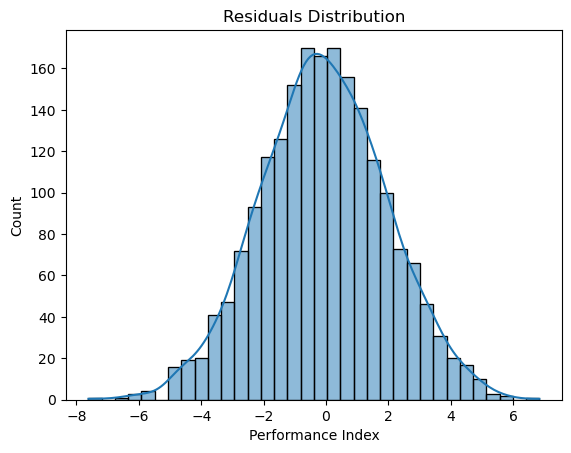

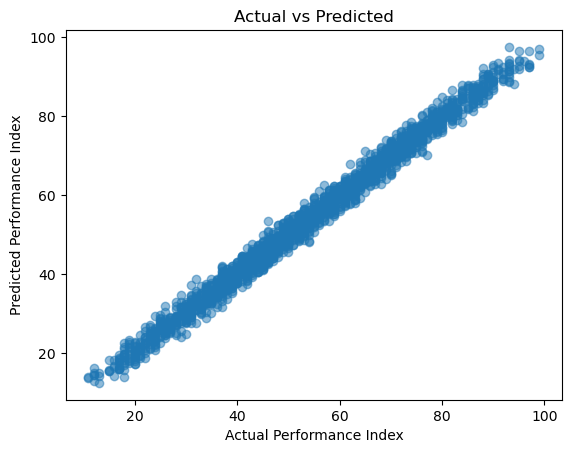

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()


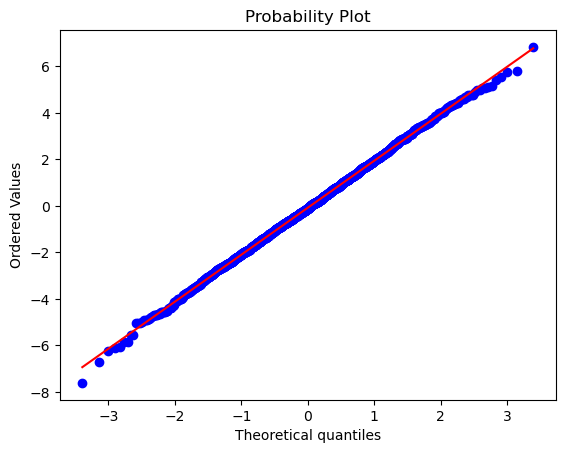

In [72]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [74]:
import joblib as jl

jl.dump(model, "model.pkl")

['model.pkl']